In [1]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# 랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 고정:", SEED)

시드 고정: 12


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
wine_path = '/gdrive/My Drive/Colab Notebooks/ML-Study/ML-Study/DeepLearning/Python_DeepLearning/wine/'

train = pd.read_csv(wine_path + 'train.csv')
test = pd.read_csv(wine_path + 'test.csv')
submission = pd.read_csv(wine_path + 'sample_submission.csv')

print(train.shape, test.shape, submission.shape)

(5497, 14) (1000, 13) (1000, 2)


In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [6]:
# 데이터 전처리
# 1. 범주형 데이터 처리
train.loc[:,['quality']] = train.loc[:,['quality']] - 3
train['quality'].value_counts()

3    2416
2    1788
4     924
1     186
5     152
0      26
6       5
Name: quality, dtype: int64

In [7]:
train['type'] = np.where(train['type']=='white', 1, 0).astype(int)
test['type'] = np.where(test['type']=='white', 1, 0).astype(int)
train['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [8]:
# 0~1 사이 값으로 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train.loc[:, 'fixed acidity':])
test_scaled = scaler.fit_transform(test.loc[:, 'fixed acidity':])

train.loc[:, 'fixed acidity':] = train_scaled
test.loc[:, 'fixed acidity':] = test_scaled
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,2,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0
1,1,2,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0
2,2,2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0
3,3,3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0
4,4,3,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0


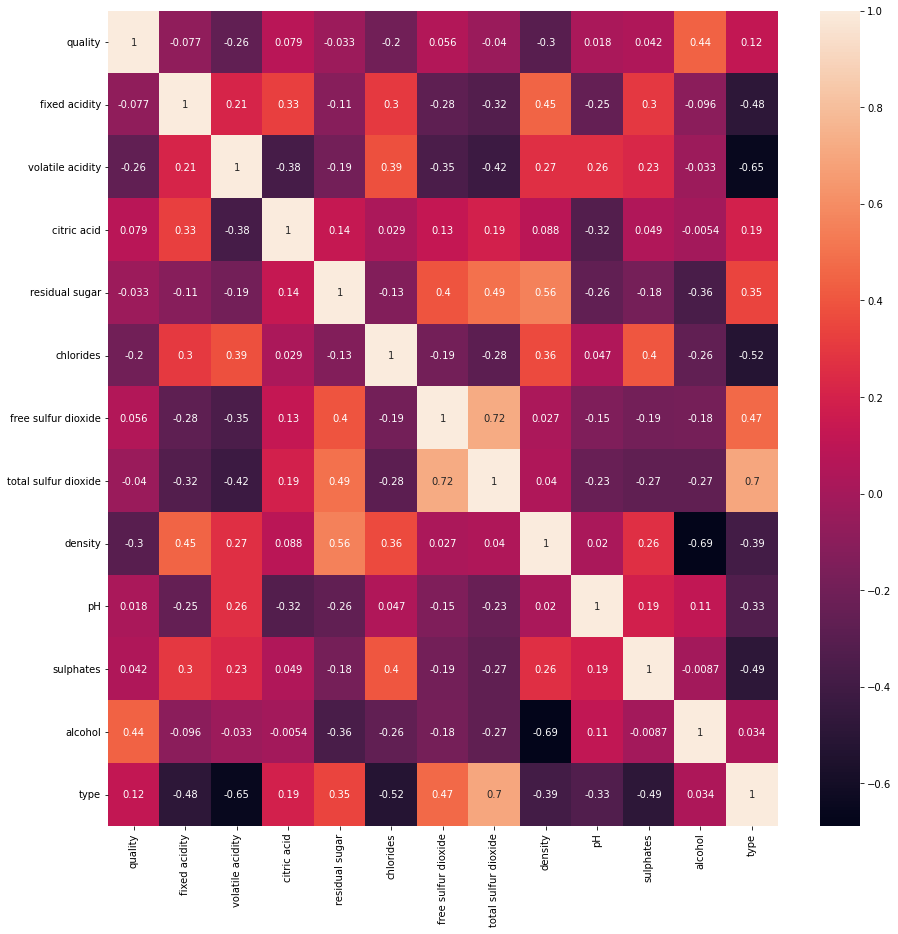

In [9]:
# EDA
plt.figure(figsize=(15,15))
sns.heatmap(train.loc[:, 'quality':].corr(), annot=True, cbar=True)
plt.show()
# quality 상관계수 순위 : 1. alcohol 2. density 3. volatil acidity 4. chlorides

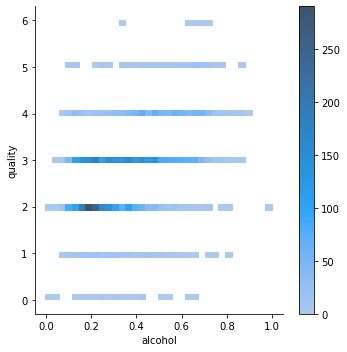

In [10]:
sns.displot(x='alcohol', y='quality', cbar=True, data=train, kind='hist')
plt.show()

In [11]:
# bins = [0.0, 0.1, 0.3, 0.5, 0.7, 1.0]
# labels = ['xs', 's', 'm', 'l', 'xl']
# train['alcoholBin'] = pd.cut(train['alcohol'], bins=bins, labels=labels)
# test['alcoholBin'] = pd.cut(test['alcohol'], bins=bins, labels=labels)
# train.head()

In [13]:
# sns.displot(x='alcoholBin', y='quality', cbar=True, data=train, kind='hist')
# plt.show()

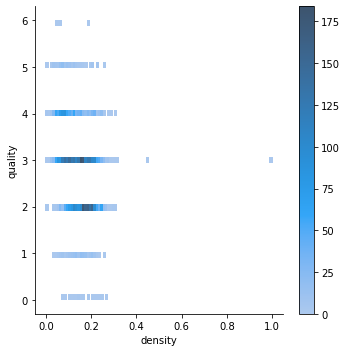

In [14]:
sns.displot(x='density', y='quality', cbar=True, data=train, kind='hist')
plt.show()

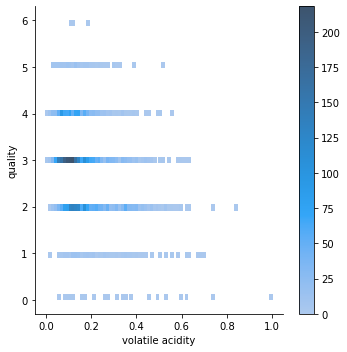

In [15]:
sns.displot(x='volatile acidity', y='quality', cbar=True, data=train, kind='hist')
plt.show()

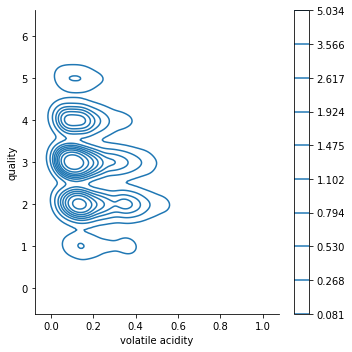

In [16]:
sns.displot(x='volatile acidity', y='quality', cbar=True, data=train, kind='kde')
plt.show()

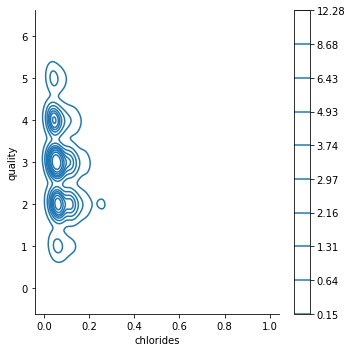

In [17]:
sns.displot(x='chlorides', y='quality', cbar=True, data=train, kind='kde')
plt.show()

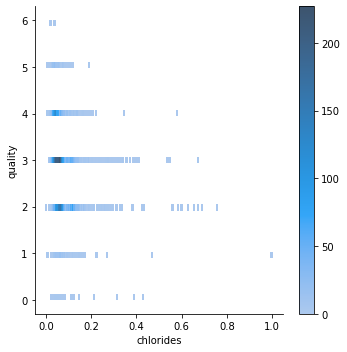

In [18]:
sns.displot(x='chlorides', y='quality', cbar=True, data=train, kind='hist')
plt.show()

In [19]:
# chlorides_bins = [0.0, 0.1, 0.2, 0.3, 1.0]
# chlorides_labels = ['xxs', 'xs', 's', 'l']
# train['chloridesBin'] = pd.cut(train['chlorides'], bins=chlorides_bins, labels=chlorides_labels)
# test['chloridesBin'] = pd.cut(test['chlorides'], bins=chlorides_bins, labels=chlorides_labels)
# train.head()

In [20]:
# sns.displot(x='chloridesBin', y='quality', cbar=True, data=train, kind='hist')
# plt.show()

In [21]:
# # 범주형 변수 원핫 인코딩
# onehot_prefix = []
# for col in ['alcoholBin', 'chloridesBin']:
#   train[col] = train[col].astype('category')
#   test[col] = test[col].astype('category')
#   # 열 이름을 [prefix + _ + 범주데이터] 형태로 변환. 
#   # drop_first=True로 첫번째열 삭제
#   train = pd.get_dummies(train, columns=[col], prefix=col[:3], drop_first=True)
#   test = pd.get_dummies(test, columns=[col], prefix=col[:3], drop_first=True)
#   onehot_prefix.append(col[:3])

# train.loc[:, [col for col in train.columns if col[:3] in onehot_prefix]].head()

In [22]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,2,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0
1,1,2,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0
2,2,2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0
3,3,3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0
4,4,3,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0


In [29]:
# 피처 선정
selected_features = [col for col in train.keys() if col not in ['index', 'quality']]
selected_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

In [30]:
# 학습 데이터 만들기
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train = train.loc[:, selected_features]
y_train = to_categorical(train.loc[:, 'quality'])
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True, random_state=SEED)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)
print(y_tr[:5])
X_tr.head()

(4672, 12) (4672, 7)
(825, 12) (825, 7)
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
868,0.231405,0.153333,0.168675,0.012270,0.043261,0.093750,0.232719,0.024099,0.204724,0.101124,0.753623,1.0
4037,0.181818,0.080000,0.156627,0.216258,0.059900,0.180556,0.274194,0.216985,0.196850,0.264045,0.202899,1.0
1781,0.330579,0.273333,0.295181,0.098160,0.056572,0.097222,0.329493,0.155967,0.370079,0.061798,0.289855,1.0
3125,0.206612,0.146667,0.114458,0.108896,0.066556,0.159722,0.410138,0.154810,0.377953,0.146067,0.217391,1.0
3866,0.223140,0.140000,0.253012,0.153374,0.054908,0.225694,0.451613,0.185656,0.393701,0.174157,0.217391,1.0


In [31]:
# 딥러닝 모델 만들기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(train_data, train_target):
  model = Sequential()
  model.add(Dense(128, activation='tanh', input_dim=train_data.shape[1]))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(16, activation='tanh'))
  model.add(Dense(train_target.shape[1], activation='softmax'))

  model.compile(optimizer='RMSProp', loss='categorical_crossentropy',
              metrics=['acc', 'mae'])
  
  return model

model = build_model(X_tr, y_tr)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_tr, y_tr, batch_size=64, epochs=200, validation_data=(X_val, y_val),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/200
73/73 - 1s - loss: 1.3787 - acc: 0.4264 - mae: 0.2001 - val_loss: 1.2252 - val_acc: 0.5127 - val_mae: 0.1897 - 1s/epoch - 19ms/step
Epoch 2/200
73/73 - 0s - loss: 1.2215 - acc: 0.4908 - mae: 0.1844 - val_loss: 1.1216 - val_acc: 0.5358 - val_mae: 0.1764 - 227ms/epoch - 3ms/step
Epoch 3/200
73/73 - 0s - loss: 1.1603 - acc: 0.5047 - mae: 0.1764 - val_loss: 1.0951 - val_acc: 0.5382 - val_mae: 0.1690 - 208ms/epoch - 3ms/step
Epoch 4/200
73/73 - 0s - loss: 1.1338 - acc: 0.5203 - mae: 0.1725 - val_loss: 1.1345 - val_acc: 0.5030 - val_mae: 0.1708 - 214ms/epoch - 3ms/step
Epoch 5/200
73/73 - 0s - loss: 1.1228 - acc: 0.5201 - mae: 0.1718 - val_loss: 1.0715 - val_acc: 0.5479 - val_mae: 0.1678 - 192ms/epoch - 3ms/step
Epoch 6/200
73/73 - 0s - loss: 1.1157 - acc: 0.5186 - mae: 0.1715 - val_loss: 1.0657 - val_acc: 0.5552 - val_mae: 0.1670 - 196ms/epoch - 3ms/step
Epoch 7/200
73/73 - 0s - loss: 1.1064 - acc: 0.5246 - mae: 0.1709 - val_loss: 1.0632 - val_acc: 0.5406 - val_mae: 0.1661 - 195

In [33]:
model.evaluate(X_val, y_val)

26/26 [==============================] - 0s 2ms/step - loss: 1.0271 - acc: 0.5600 - mae: 0.1619


[1.0271427631378174, 0.5600000023841858, 0.1619110256433487]

In [34]:
# test 데이터 처리 안했다..
X_test = test.loc[:, selected_features]
X_test.head()
X_test.shape

(1000, 12)

In [35]:
# test 데이터에 대한 예측값 정리
y_pred_proba = model.predict(X_test)
y_pred_proba[:5]

array([[6.5031939e-04, 6.4040842e-03, 1.5701799e-01, 5.9576613e-01,
        2.0897622e-01, 3.1019559e-02, 1.6572115e-04],
       [3.5611133e-03, 6.2641583e-02, 7.2422862e-01, 1.9146085e-01,
        1.5845856e-02, 2.1161700e-03, 1.4579955e-04],
       [3.1947684e-03, 2.0561462e-02, 5.3318173e-01, 4.1678721e-01,
        2.1257203e-02, 4.8720185e-03, 1.4569281e-04],
       [5.8716745e-03, 3.3918731e-02, 4.6084908e-01, 3.9773872e-01,
        9.1402076e-02, 9.7139021e-03, 5.0582155e-04],
       [1.0349948e-03, 2.7672024e-03, 2.2411935e-02, 2.6439875e-01,
        5.3564894e-01, 1.7178261e-01, 1.9555895e-03]], dtype=float32)

In [36]:
y_pred_label = np.argmax(y_pred_proba, axis=-1) + 3
y_pred_label[:5]

array([6, 5, 5, 5, 7])

In [37]:
# 제출 양식에 맞게 정리
submission['quality'] = y_pred_label.astype(int)
submission.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,5
4,4,7


In [38]:
submission.to_csv(wine_path + 'my_wine_dnn_002.csv', index=False)

binning 포기시 0.48점   
binning을 해야할 때가 있고 하지 말아야할 때가 있다...